# Import and install dependencies

In [ ]:
!pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python mediapipe sklearn matplotlib

In [41]:

import cv2 
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# key points using MP holistic

In [42]:
mp_holistic =mp.solutions.holistic #holistic model
mp_drawing = mp.solutions.drawing_utils #Drawing Utilities

In [43]:
def mediapipe_detection(image,model):
    image =cv2.cvtColor(image, cv2.COLOR_BGR2RGB)#color conversion
    image.flags.writeable = False                #Image wtritable status false
    results =model.process(image)                #make prediction
    image.flags.writeable = True                 #Image wtritable status true
    image =cv2.cvtColor(image, cv2.COLOR_RGB2BGR)#reverse color conversion
    return image, results

In [44]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION)#draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)#draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)#DRAW LEFT HAND CONNECTION
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)#draw right hand connection

In [45]:
def draw_styled_landmarks(image,results):
    #draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
                              
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1) 
                                                        
                             
                             
                             )
    #draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                              
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=1, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(66,44,121), thickness=1, circle_radius=2)
                             
                             )
    #DRAW LEFT HAND CONNECTION
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                              
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=1, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(121,44,121), thickness=1, circle_radius=2)
                             
                             
                             )
    #draw right hand connection
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                              
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=1, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=1, circle_radius=2)
                             
                              )


In [ ]:
mp_drawing.draw_landmarks??

In [47]:
cap = cv2.VideoCapture(0)   #accessing web cam..setting up device

#access mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5)as holistic:#initial detection confidense and tracking confidence
    while cap.isOpened():
        #read feed
        ret,frame =cap.read()

        #make detection
        image, results =mediapipe_detection(frame, holistic)
        print(results)
        
        #draw_landmarks
        draw_styled_landmarks(image, results)

        #show to screen
        cv2.imshow('open cv feed',image)#should replace image instead of frame to see landmarks
        if cv2.waitKey(10) & 0xff == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()
    

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [ ]:
frame

In [ ]:
results

In [48]:
draw_landmarks(frame, results)

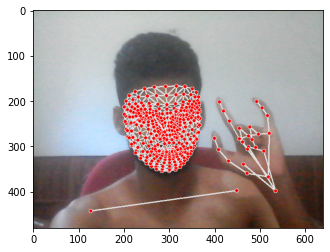

In [49]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

# Extract Keypoiny Values

In [50]:
results.pose_landmarks

landmark {
  x: 0.4541248679161072
  y: 0.5588145852088928
  z: -1.2246278524398804
  visibility: 0.9999868869781494
}
landmark {
  x: 0.4745393693447113
  y: 0.47167447209358215
  z: -1.135249137878418
  visibility: 0.9999815821647644
}
landmark {
  x: 0.49224966764450073
  y: 0.46600958704948425
  z: -1.135034203529358
  visibility: 0.9999802708625793
}
landmark {
  x: 0.5099211931228638
  y: 0.4612490236759186
  z: -1.1341158151626587
  visibility: 0.9999774694442749
}
landmark {
  x: 0.4146186411380768
  y: 0.4828053414821625
  z: -1.1373838186264038
  visibility: 0.9999778270721436
}
landmark {
  x: 0.3911544978618622
  y: 0.4841413199901581
  z: -1.1357921361923218
  visibility: 0.9999715685844421
}
landmark {
  x: 0.3711802661418915
  y: 0.4868234395980835
  z: -1.1358224153518677
  visibility: 0.9999670386314392
}
landmark {
  x: 0.5303735136985779
  y: 0.4800790250301361
  z: -0.6328818798065186
  visibility: 0.9999822974205017
}
landmark {
  x: 0.3377271592617035
  y: 0.51730

In [51]:
pose = []
for res in results.pose_landmarks.landmark:
    test =np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [52]:
pose=np.array([[res.x, res.y, res.z, res.visibility]for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face=np.array([[res.x, res.y, res.z]for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh=np.array([[res.x, res.y, res.z]for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh=np.array([[res.x, res.y, res.z]for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)


In [53]:
def extract_keypoints(results):
    pose=np.array([[res.x, res.y, res.z, res.visibility]for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)#no of landmarks * values
    face=np.array([[res.x, res.y, res.z]for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh=np.array([[res.x, res.y, res.z]for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh=np.array([[res.x, res.y, res.z]for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose,face,lh,rh])

In [142]:
extract_keypoints(results).shape

(1662,)

In [128]:
len(results.face_landmarks.landmark)*3 #because 3 value in each

1404

In [116]:
lh.shape

(63,)

In [104]:
len(results.left_hand_landmarks.landmark)

21

In [91]:
test

array([4.70722586e-01, 3.63283587e+00, 6.37207627e-01, 6.37279227e-05])

In [14]:
pose #all keypoint values

array([ 5.57908297e-01,  5.94994783e-01, -1.12236130e+00,  9.99863923e-01,
        5.83737016e-01,  5.21903813e-01, -1.02486491e+00,  9.99838173e-01,
        5.98825336e-01,  5.22328496e-01, -1.02504408e+00,  9.99829829e-01,
        6.12906337e-01,  5.22851706e-01, -1.02513826e+00,  9.99822676e-01,
        5.24475574e-01,  5.18498302e-01, -1.05659413e+00,  9.99824822e-01,
        4.97176945e-01,  5.17211974e-01, -1.05601192e+00,  9.99811351e-01,
        4.72411215e-01,  5.16657948e-01, -1.05632770e+00,  9.99798834e-01,
        6.20790720e-01,  5.36590636e-01, -4.19486821e-01,  9.99877334e-01,
        4.26842064e-01,  5.25273383e-01, -5.68482339e-01,  9.99881327e-01,
        5.80749691e-01,  6.73108816e-01, -8.88310313e-01,  9.99862731e-01,
        5.07745564e-01,  6.75252616e-01, -9.33549702e-01,  9.99849260e-01,
        7.55621552e-01,  8.53279293e-01, -1.11838937e-01,  9.98685241e-01,
        2.68532932e-01,  8.60510826e-01, -3.16881806e-01,  9.89564896e-01,
        1.13385367e+00,  

# Setup folders for collection

In [6]:
#path for the exported data,numpy arrays
DATA_PATH = os.path.join('MP_Data')

#Actions that we try to detect
actions = np.array(['hello','thanks','I Love You'])
#thirty videos worth of data
no_sequence = 30
#videoes are going to 30 frames in length
sequence_length = 30

In [ ]:
#folder structure

#hello(main folder)
## 1(subfolders)
## 2
## 3
##...
## 29
#thanks
## 1
## 2
## 3
##...
## 29
#I love you
## 1
## 2
## 3
##...
## 29


In [121]:
for action in actions:
    for sequence in range(no_sequence):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass
    

# Collecting Keypoint Values for Training and Testing

In [122]:
cap = cv2.VideoCapture(0)   #accessing web cam..setting up device

#access mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5)as holistic:#initial detection confidense and tracking confidence
    
    #loop through actions
    for action in actions:
        #loop through sequence aka vdeos
        for sequence in range(no_sequence):
            #loop through video length aka sequence length
            for frame_num in range(sequence_length):
                
                #read feed
                ret,frame =cap.read()

                #make detection
                image, results =mediapipe_detection(frame, holistic)
                print(results)

                #draw_landmarks
                draw_styled_landmarks(image, results)
                
                #apply wait logic
                if frame_num == 0:
                    cv2.putText(image,'STARTING COLLECTION',(120,200),
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 4,cv2.LINE_AA)
                    cv2.putText(image, 'collecting frames for {} video number {}'.format(action,sequence), (15,12),
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    cv2.waitKey(2000)
                else:
                    cv2.putText(image,'Collecting frames for {} video number {}'.format(action,sequence),(15,12),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1,cv2.LINE_AA)
                
                
                        
                        
                #show to screen
                cv2.imshow('open cv feed',image)#should replace image instead of frame to see landmarks
                
                #new export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)
                
                if cv2.waitKey(10) & 0xff == ord('q'):
                    break
    cap.release()
    cv2.destroyAllWindows()
    

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [34]:
cap.release()
cv2.destroyAllWindows()

# Preprocess Data and Create Labels and Features

In [7]:
from sklearn.model_selection import train_test_split#help to partition our data into a train partition
from tensorflow.keras.utils import to_categorical#encoded data

In [8]:
label_map = {label:num for num, label in enumerate(actions)}

In [9]:
label_map

{'hello': 0, 'thanks': 1, 'I Love You': 2}

In [10]:
sequences, labels = [], []    #creating two blank arrays  sequence= x data or the features label = y data/our labels
for action in actions:
    for sequence in range(no_sequence):#looping through every action
        window = []#creating blank array
        for frame_num in range(sequence_length):#looping through each frame
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))#path 
            window.append(res)#appending to windows
        sequences.append(window)#appending video or the window to sequences
        labels.append(label_map[action])

In [11]:
np.array(sequences).shape

(90, 30, 1662)

In [12]:
sequences

[[array([ 0.55859447,  0.31540298, -1.10071301, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.56477159,  0.32599571, -1.2781961 , ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.56529605,  0.33408022, -1.21546733, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.56704801,  0.33977601, -1.22666204, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.56674814,  0.3390584 , -1.26334321, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.56655872,  0.33907685, -1.25643611, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.56680602,  0.33859017, -1.26142073, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.56672108,  0.33822238, -1.21369565, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.5666787 ,  0.33810595, -1.26287687, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.56817549,  0.33799711, -1.30036235, ...,  0.        ,
       

In [13]:
np.array(labels).shape

(90,)

In [14]:
x = np.array(sequences)

In [15]:
x.shape

(90, 30, 1662)

In [16]:
y = to_categorical(labels).astype(int)

In [53]:
y #1,0,0 =hello

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.05)

In [18]:
x_train.shape

(85, 30, 1662)

In [135]:
x_test.shape

(5, 30, 1662)

In [136]:
y_train.shape

(85, 3)

In [137]:
y_test.shape

(5, 3)

# Build and train LSTM Neural Network

In [19]:
from tensorflow.keras.models import Sequential #allows us to build sequential neural network
from tensorflow.keras.layers import LSTM, Dense#lstm layer:this gives trmporary component that helps to build a neural network nd to perform action dtection
from tensorflow.keras.callbacks import TensorBoard#trace ,monitor model 

In [20]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir = log_dir)

In [33]:
model = Sequential()#easy to build up model with layers
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [22]:
x.shape

(90, 30, 1662)

In [23]:
actions.shape[0]

3

In [24]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])#loss function

In [25]:
model.fit(x_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 4s 755ms/step - loss: 1.1364 - categorical_accuracy: 0.2838
Epoch 2/2000
3/3 [==============================] - 0s 91ms/step - loss: 13.6516 - categorical_accuracy: 0.3307
Epoch 3/2000
3/3 [==============================] - 0s 90ms/step - loss: 5.6057 - categorical_accuracy: 0.3308
Epoch 4/2000
3/3 [==============================] - 0s 90ms/step - loss: 1.8880 - categorical_accuracy: 0.3600
Epoch 5/2000
3/3 [==============================] - 0s 91ms/step - loss: 1.9062 - categorical_accuracy: 0.2858
Epoch 6/2000
3/3 [==============================] - 0s 91ms/step - loss: 5.8115 - categorical_accuracy: 0.3934
Epoch 7/2000
3/3 [==============================] - 0s 91ms/step - loss: 11.9997 - categorical_accuracy: 0.2780
Epoch 8/2000
3/3 [==============================] - 0s 91ms/step - loss: 3.1563 - categorical_accuracy: 0.3835
Epoch 9/2000
3/3 [==============================] - 0s 92ms/step - loss: 2.1397 - categorical_accuracy: 0.252

Epoch 74/2000
3/3 [==============================] - 0s 91ms/step - loss: 0.0917 - categorical_accuracy: 0.9628
Epoch 75/2000
3/3 [==============================] - 0s 89ms/step - loss: 0.1512 - categorical_accuracy: 0.9491
Epoch 76/2000
3/3 [==============================] - 0s 91ms/step - loss: 0.3902 - categorical_accuracy: 0.8884
Epoch 77/2000
3/3 [==============================] - 0s 89ms/step - loss: 0.5009 - categorical_accuracy: 0.8356
Epoch 78/2000
3/3 [==============================] - 0s 91ms/step - loss: 0.3693 - categorical_accuracy: 0.8551
Epoch 79/2000
3/3 [==============================] - 0s 90ms/step - loss: 0.2223 - categorical_accuracy: 0.9354
Epoch 80/2000
3/3 [==============================] - 0s 87ms/step - loss: 0.1770 - categorical_accuracy: 0.9667
Epoch 81/2000
3/3 [==============================] - 0s 91ms/step - loss: 0.2649 - categorical_accuracy: 0.9119
Epoch 82/2000
3/3 [==============================] - 0s 92ms/step - loss: 0.4135 - categorical_accuracy:

3/3 [==============================] - 0s 94ms/step - loss: 1.8060e-04 - categorical_accuracy: 1.0000
Epoch 218/2000
3/3 [==============================] - 0s 92ms/step - loss: 1.9454e-04 - categorical_accuracy: 1.0000
Epoch 219/2000
3/3 [==============================] - 0s 87ms/step - loss: 2.0956e-04 - categorical_accuracy: 1.0000
Epoch 220/2000
3/3 [==============================] - 0s 93ms/step - loss: 1.9568e-04 - categorical_accuracy: 1.0000
Epoch 221/2000
3/3 [==============================] - 0s 91ms/step - loss: 1.6681e-04 - categorical_accuracy: 1.0000
Epoch 222/2000
3/3 [==============================] - 0s 85ms/step - loss: 1.8139e-04 - categorical_accuracy: 1.0000
Epoch 223/2000
3/3 [==============================] - 0s 93ms/step - loss: 1.5686e-04 - categorical_accuracy: 1.0000
Epoch 224/2000
3/3 [==============================] - 0s 91ms/step - loss: 1.9510e-04 - categorical_accuracy: 1.0000
Epoch 225/2000
3/3 [==============================] - 0s 88ms/step - loss: 1.91

3/3 [==============================] - 0s 89ms/step - loss: 6.4353e-05 - categorical_accuracy: 1.0000
Epoch 288/2000
3/3 [==============================] - 0s 88ms/step - loss: 7.6841e-05 - categorical_accuracy: 1.0000
Epoch 289/2000
3/3 [==============================] - 0s 86ms/step - loss: 8.3616e-05 - categorical_accuracy: 1.0000
Epoch 290/2000
3/3 [==============================] - 0s 86ms/step - loss: 4.8316e-05 - categorical_accuracy: 1.0000
Epoch 291/2000
3/3 [==============================] - 0s 84ms/step - loss: 6.1124e-05 - categorical_accuracy: 1.0000
Epoch 292/2000
3/3 [==============================] - 0s 103ms/step - loss: 7.3049e-05 - categorical_accuracy: 1.0000
Epoch 293/2000
3/3 [==============================] - 0s 100ms/step - loss: 7.6036e-05 - categorical_accuracy: 1.0000
Epoch 294/2000
3/3 [==============================] - 0s 85ms/step - loss: 5.4665e-05 - categorical_accuracy: 1.0000
Epoch 295/2000
3/3 [==============================] - 0s 86ms/step - loss: 7.

3/3 [==============================] - 0s 86ms/step - loss: 3.5249e-05 - categorical_accuracy: 1.0000
Epoch 358/2000
3/3 [==============================] - 0s 94ms/step - loss: 3.5013e-05 - categorical_accuracy: 1.0000
Epoch 359/2000
3/3 [==============================] - 0s 90ms/step - loss: 4.6736e-05 - categorical_accuracy: 1.0000
Epoch 360/2000
3/3 [==============================] - 0s 85ms/step - loss: 2.6771e-05 - categorical_accuracy: 1.0000
Epoch 361/2000
3/3 [==============================] - 0s 90ms/step - loss: 3.8739e-05 - categorical_accuracy: 1.0000
Epoch 362/2000
3/3 [==============================] - 0s 87ms/step - loss: 3.4207e-05 - categorical_accuracy: 1.0000
Epoch 363/2000
3/3 [==============================] - 0s 85ms/step - loss: 3.3590e-05 - categorical_accuracy: 1.0000
Epoch 364/2000
3/3 [==============================] - 0s 84ms/step - loss: 3.4750e-05 - categorical_accuracy: 1.0000
Epoch 365/2000
3/3 [==============================] - 0s 87ms/step - loss: 3.26

3/3 [==============================] - 0s 87ms/step - loss: 2.6187e-05 - categorical_accuracy: 1.0000
Epoch 428/2000
3/3 [==============================] - 0s 102ms/step - loss: 2.2853e-05 - categorical_accuracy: 1.0000
Epoch 429/2000
3/3 [==============================] - 0s 88ms/step - loss: 2.9014e-05 - categorical_accuracy: 1.0000
Epoch 430/2000
3/3 [==============================] - 0s 86ms/step - loss: 1.9524e-05 - categorical_accuracy: 1.0000
Epoch 431/2000
3/3 [==============================] - 0s 84ms/step - loss: 2.5642e-05 - categorical_accuracy: 1.0000
Epoch 432/2000
3/3 [==============================] - 0s 88ms/step - loss: 2.3055e-05 - categorical_accuracy: 1.0000
Epoch 433/2000
3/3 [==============================] - 0s 90ms/step - loss: 2.1821e-05 - categorical_accuracy: 1.0000
Epoch 434/2000
3/3 [==============================] - 0s 88ms/step - loss: 2.4590e-05 - categorical_accuracy: 1.0000
Epoch 435/2000
3/3 [==============================] - 0s 89ms/step - loss: 2.3

3/3 [==============================] - 0s 85ms/step - loss: 1.6593e-05 - categorical_accuracy: 1.0000
Epoch 498/2000
3/3 [==============================] - 0s 87ms/step - loss: 1.4738e-05 - categorical_accuracy: 1.0000
Epoch 499/2000
3/3 [==============================] - 0s 87ms/step - loss: 1.5288e-05 - categorical_accuracy: 1.0000
Epoch 500/2000
3/3 [==============================] - 0s 88ms/step - loss: 1.6366e-05 - categorical_accuracy: 1.0000
Epoch 501/2000
3/3 [==============================] - 0s 87ms/step - loss: 1.8309e-05 - categorical_accuracy: 1.0000
Epoch 502/2000
3/3 [==============================] - 0s 87ms/step - loss: 1.8016e-05 - categorical_accuracy: 1.0000
Epoch 503/2000
3/3 [==============================] - 0s 89ms/step - loss: 1.3843e-05 - categorical_accuracy: 1.0000
Epoch 504/2000
3/3 [==============================] - 0s 86ms/step - loss: 1.5125e-05 - categorical_accuracy: 1.0000
Epoch 505/2000
3/3 [==============================] - 0s 89ms/step - loss: 1.17

3/3 [==============================] - 0s 86ms/step - loss: 1.4934e-05 - categorical_accuracy: 1.0000
Epoch 568/2000
3/3 [==============================] - 0s 86ms/step - loss: 1.4634e-05 - categorical_accuracy: 1.0000
Epoch 569/2000
3/3 [==============================] - 0s 87ms/step - loss: 1.4244e-05 - categorical_accuracy: 1.0000
Epoch 570/2000
3/3 [==============================] - 0s 86ms/step - loss: 1.4033e-05 - categorical_accuracy: 1.0000
Epoch 571/2000
3/3 [==============================] - 0s 86ms/step - loss: 1.0867e-05 - categorical_accuracy: 1.0000
Epoch 572/2000
3/3 [==============================] - 0s 86ms/step - loss: 1.4853e-05 - categorical_accuracy: 1.0000
Epoch 573/2000
3/3 [==============================] - 0s 88ms/step - loss: 1.2378e-05 - categorical_accuracy: 1.0000
Epoch 574/2000
3/3 [==============================] - 0s 85ms/step - loss: 9.3152e-06 - categorical_accuracy: 1.0000
Epoch 575/2000
3/3 [==============================] - 0s 89ms/step - loss: 1.09

3/3 [==============================] - 0s 84ms/step - loss: 8.6159e-06 - categorical_accuracy: 1.0000
Epoch 638/2000
3/3 [==============================] - 0s 84ms/step - loss: 8.3163e-06 - categorical_accuracy: 1.0000
Epoch 639/2000
3/3 [==============================] - 0s 84ms/step - loss: 9.0202e-06 - categorical_accuracy: 1.0000
Epoch 640/2000
3/3 [==============================] - 0s 99ms/step - loss: 1.1704e-05 - categorical_accuracy: 1.0000
Epoch 641/2000
3/3 [==============================] - 0s 88ms/step - loss: 8.5074e-06 - categorical_accuracy: 1.0000
Epoch 642/2000
3/3 [==============================] - 0s 84ms/step - loss: 1.0366e-05 - categorical_accuracy: 1.0000
Epoch 643/2000
3/3 [==============================] - 0s 86ms/step - loss: 9.6281e-06 - categorical_accuracy: 1.0000
Epoch 644/2000
3/3 [==============================] - 0s 86ms/step - loss: 7.8607e-06 - categorical_accuracy: 1.0000
Epoch 645/2000
3/3 [==============================] - 0s 83ms/step - loss: 1.13

3/3 [==============================] - 0s 87ms/step - loss: 9.3042e-06 - categorical_accuracy: 1.0000
Epoch 708/2000
3/3 [==============================] - 0s 88ms/step - loss: 5.7889e-06 - categorical_accuracy: 1.0000
Epoch 709/2000
3/3 [==============================] - 0s 87ms/step - loss: 6.2613e-06 - categorical_accuracy: 1.0000
Epoch 710/2000
3/3 [==============================] - 0s 87ms/step - loss: 8.7057e-06 - categorical_accuracy: 1.0000
Epoch 711/2000
3/3 [==============================] - 0s 86ms/step - loss: 6.3391e-06 - categorical_accuracy: 1.0000
Epoch 712/2000
3/3 [==============================] - 0s 88ms/step - loss: 7.9848e-06 - categorical_accuracy: 1.0000
Epoch 713/2000
3/3 [==============================] - 0s 87ms/step - loss: 7.9589e-06 - categorical_accuracy: 1.0000
Epoch 714/2000
3/3 [==============================] - 0s 86ms/step - loss: 8.4350e-06 - categorical_accuracy: 1.0000
Epoch 715/2000
3/3 [==============================] - 0s 86ms/step - loss: 7.85

3/3 [==============================] - 0s 95ms/step - loss: 5.6380e-06 - categorical_accuracy: 1.0000
Epoch 778/2000
3/3 [==============================] - 0s 88ms/step - loss: 5.0422e-06 - categorical_accuracy: 1.0000
Epoch 779/2000
3/3 [==============================] - 0s 87ms/step - loss: 5.7986e-06 - categorical_accuracy: 1.0000
Epoch 780/2000
3/3 [==============================] - 0s 85ms/step - loss: 5.7012e-06 - categorical_accuracy: 1.0000
Epoch 781/2000
3/3 [==============================] - 0s 112ms/step - loss: 5.1713e-06 - categorical_accuracy: 1.0000
Epoch 782/2000
3/3 [==============================] - 0s 96ms/step - loss: 6.8214e-06 - categorical_accuracy: 1.0000
Epoch 783/2000
3/3 [==============================] - 0s 83ms/step - loss: 4.7561e-06 - categorical_accuracy: 1.0000
Epoch 784/2000
3/3 [==============================] - 0s 136ms/step - loss: 4.7160e-06 - categorical_accuracy: 1.0000
Epoch 785/2000
3/3 [==============================] - 0s 88ms/step - loss: 4.

3/3 [==============================] - 0s 87ms/step - loss: 5.4241e-06 - categorical_accuracy: 1.0000
Epoch 848/2000
3/3 [==============================] - 0s 102ms/step - loss: 5.5205e-06 - categorical_accuracy: 1.0000
Epoch 849/2000
3/3 [==============================] - 0s 83ms/step - loss: 3.5087e-06 - categorical_accuracy: 1.0000
Epoch 850/2000
3/3 [==============================] - 0s 84ms/step - loss: 5.1668e-06 - categorical_accuracy: 1.0000
Epoch 851/2000
3/3 [==============================] - 0s 85ms/step - loss: 4.4043e-06 - categorical_accuracy: 1.0000
Epoch 852/2000
3/3 [==============================] - 0s 86ms/step - loss: 3.9023e-06 - categorical_accuracy: 1.0000
Epoch 853/2000
3/3 [==============================] - 0s 83ms/step - loss: 3.7680e-06 - categorical_accuracy: 1.0000
Epoch 854/2000
3/3 [==============================] - 0s 89ms/step - loss: 5.2461e-06 - categorical_accuracy: 1.0000
Epoch 855/2000
3/3 [==============================] - 0s 87ms/step - loss: 5.7

3/3 [==============================] - 0s 86ms/step - loss: 4.2849e-06 - categorical_accuracy: 1.0000
Epoch 918/2000
3/3 [==============================] - 0s 88ms/step - loss: 4.6998e-06 - categorical_accuracy: 1.0000
Epoch 919/2000
3/3 [==============================] - 0s 88ms/step - loss: 3.4344e-06 - categorical_accuracy: 1.0000
Epoch 920/2000
3/3 [==============================] - 0s 87ms/step - loss: 4.3933e-06 - categorical_accuracy: 1.0000
Epoch 921/2000
3/3 [==============================] - 0s 87ms/step - loss: 4.3395e-06 - categorical_accuracy: 1.0000
Epoch 922/2000
3/3 [==============================] - 0s 85ms/step - loss: 4.6499e-06 - categorical_accuracy: 1.0000
Epoch 923/2000
3/3 [==============================] - 0s 84ms/step - loss: 4.4219e-06 - categorical_accuracy: 1.0000
Epoch 924/2000
3/3 [==============================] - 0s 85ms/step - loss: 4.3108e-06 - categorical_accuracy: 1.0000
Epoch 925/2000
3/3 [==============================] - 0s 88ms/step - loss: 3.78

3/3 [==============================] - 0s 88ms/step - loss: 2.3448e-06 - categorical_accuracy: 1.0000
Epoch 1057/2000
3/3 [==============================] - 0s 83ms/step - loss: 2.2519e-06 - categorical_accuracy: 1.0000
Epoch 1058/2000
3/3 [==============================] - 0s 101ms/step - loss: 3.0537e-06 - categorical_accuracy: 1.0000
Epoch 1059/2000
3/3 [==============================] - 0s 88ms/step - loss: 3.0863e-06 - categorical_accuracy: 1.0000
Epoch 1060/2000
3/3 [==============================] - 0s 84ms/step - loss: 3.3194e-06 - categorical_accuracy: 1.0000
Epoch 1061/2000
3/3 [==============================] - 0s 85ms/step - loss: 3.0909e-06 - categorical_accuracy: 1.0000
Epoch 1062/2000
3/3 [==============================] - 0s 86ms/step - loss: 3.3948e-06 - categorical_accuracy: 1.0000
Epoch 1063/2000
3/3 [==============================] - 0s 82ms/step - loss: 2.1028e-06 - categorical_accuracy: 1.0000
Epoch 1064/2000
3/3 [==============================] - 0s 88ms/step - l

3/3 [==============================] - 0s 85ms/step - loss: 1.4320e-06 - categorical_accuracy: 1.0000
Epoch 1195/2000
3/3 [==============================] - 0s 86ms/step - loss: 1.7524e-06 - categorical_accuracy: 1.0000
Epoch 1196/2000
3/3 [==============================] - 0s 85ms/step - loss: 2.0322e-06 - categorical_accuracy: 1.0000
Epoch 1197/2000
3/3 [==============================] - 0s 83ms/step - loss: 1.8106e-06 - categorical_accuracy: 1.0000
Epoch 1198/2000
3/3 [==============================] - 0s 85ms/step - loss: 1.5097e-06 - categorical_accuracy: 1.0000
Epoch 1199/2000
3/3 [==============================] - 0s 86ms/step - loss: 1.6254e-06 - categorical_accuracy: 1.0000
Epoch 1200/2000
3/3 [==============================] - 0s 85ms/step - loss: 1.5507e-06 - categorical_accuracy: 1.0000
Epoch 1201/2000
3/3 [==============================] - 0s 87ms/step - loss: 1.9353e-06 - categorical_accuracy: 1.0000
Epoch 1202/2000
3/3 [==============================] - 0s 88ms/step - lo

3/3 [==============================] - 0s 93ms/step - loss: 1.2027e-06 - categorical_accuracy: 1.0000
Epoch 1333/2000
3/3 [==============================] - 0s 91ms/step - loss: 1.5079e-06 - categorical_accuracy: 1.0000
Epoch 1334/2000
3/3 [==============================] - 0s 102ms/step - loss: 1.5138e-06 - categorical_accuracy: 1.0000
Epoch 1335/2000
3/3 [==============================] - 0s 89ms/step - loss: 1.4930e-06 - categorical_accuracy: 1.0000
Epoch 1336/2000
3/3 [==============================] - 0s 94ms/step - loss: 1.1051e-06 - categorical_accuracy: 1.0000
Epoch 1337/2000
3/3 [==============================] - 0s 85ms/step - loss: 1.0800e-06 - categorical_accuracy: 1.0000
Epoch 1338/2000
3/3 [==============================] - 0s 87ms/step - loss: 1.2676e-06 - categorical_accuracy: 1.0000
Epoch 1339/2000
3/3 [==============================] - 0s 84ms/step - loss: 1.1752e-06 - categorical_accuracy: 1.0000
Epoch 1340/2000
3/3 [==============================] - 0s 87ms/step - l

3/3 [==============================] - 0s 90ms/step - loss: 8.1410e-07 - categorical_accuracy: 1.0000
Epoch 1471/2000
3/3 [==============================] - 0s 84ms/step - loss: 9.9570e-07 - categorical_accuracy: 1.0000
Epoch 1472/2000
3/3 [==============================] - 0s 88ms/step - loss: 1.1761e-06 - categorical_accuracy: 1.0000
Epoch 1473/2000
3/3 [==============================] - 0s 88ms/step - loss: 6.8114e-07 - categorical_accuracy: 1.0000
Epoch 1474/2000
3/3 [==============================] - 0s 86ms/step - loss: 9.8894e-07 - categorical_accuracy: 1.0000
Epoch 1475/2000
3/3 [==============================] - 0s 90ms/step - loss: 7.9546e-07 - categorical_accuracy: 1.0000
Epoch 1476/2000
3/3 [==============================] - 0s 89ms/step - loss: 1.0765e-06 - categorical_accuracy: 1.0000
Epoch 1477/2000
3/3 [==============================] - 0s 87ms/step - loss: 8.0616e-07 - categorical_accuracy: 1.0000
Epoch 1478/2000
3/3 [==============================] - 0s 88ms/step - lo

3/3 [==============================] - 0s 92ms/step - loss: 6.2992e-07 - categorical_accuracy: 1.0000
Epoch 1609/2000
3/3 [==============================] - 0s 83ms/step - loss: 6.2874e-07 - categorical_accuracy: 1.0000
Epoch 1610/2000
3/3 [==============================] - 0s 86ms/step - loss: 5.5074e-07 - categorical_accuracy: 1.0000
Epoch 1611/2000
3/3 [==============================] - 0s 103ms/step - loss: 7.3934e-07 - categorical_accuracy: 1.0000
Epoch 1612/2000
3/3 [==============================] - 0s 80ms/step - loss: 6.4691e-07 - categorical_accuracy: 1.0000
Epoch 1613/2000
3/3 [==============================] - 0s 84ms/step - loss: 7.1908e-07 - categorical_accuracy: 1.0000
Epoch 1614/2000
3/3 [==============================] - 0s 84ms/step - loss: 6.6086e-07 - categorical_accuracy: 1.0000
Epoch 1615/2000
3/3 [==============================] - 0s 85ms/step - loss: 4.9369e-07 - categorical_accuracy: 1.0000
Epoch 1616/2000
3/3 [==============================] - 0s 85ms/step - l

3/3 [==============================] - 0s 87ms/step - loss: 4.1561e-07 - categorical_accuracy: 1.0000
Epoch 1747/2000
3/3 [==============================] - 0s 89ms/step - loss: 3.8697e-07 - categorical_accuracy: 1.0000
Epoch 1748/2000
3/3 [==============================] - 0s 92ms/step - loss: 5.7463e-07 - categorical_accuracy: 1.0000
Epoch 1749/2000
3/3 [==============================] - 0s 90ms/step - loss: 5.1037e-07 - categorical_accuracy: 1.0000
Epoch 1750/2000
3/3 [==============================] - 0s 90ms/step - loss: 5.0199e-07 - categorical_accuracy: 1.0000
Epoch 1751/2000
3/3 [==============================] - 0s 91ms/step - loss: 5.7439e-07 - categorical_accuracy: 1.0000
Epoch 1752/2000
3/3 [==============================] - 0s 89ms/step - loss: 4.0396e-07 - categorical_accuracy: 1.0000
Epoch 1753/2000
3/3 [==============================] - 0s 90ms/step - loss: 4.2212e-07 - categorical_accuracy: 1.0000
Epoch 1754/2000
3/3 [==============================] - 0s 87ms/step - lo

3/3 [==============================] - 0s 86ms/step - loss: 3.5438e-07 - categorical_accuracy: 1.0000
Epoch 1885/2000
3/3 [==============================] - 0s 85ms/step - loss: 4.7941e-07 - categorical_accuracy: 1.0000
Epoch 1886/2000
3/3 [==============================] - 0s 88ms/step - loss: 4.1096e-07 - categorical_accuracy: 1.0000
Epoch 1887/2000
3/3 [==============================] - 0s 86ms/step - loss: 3.1457e-07 - categorical_accuracy: 1.0000
Epoch 1888/2000
3/3 [==============================] - 0s 92ms/step - loss: 3.1224e-07 - categorical_accuracy: 1.0000
Epoch 1889/2000
3/3 [==============================] - 0s 90ms/step - loss: 2.9361e-07 - categorical_accuracy: 1.0000
Epoch 1890/2000
3/3 [==============================] - 0s 87ms/step - loss: 3.7813e-07 - categorical_accuracy: 1.0000
Epoch 1891/2000
3/3 [==============================] - 0s 78ms/step - loss: 3.1992e-07 - categorical_accuracy: 1.0000
Epoch 1892/2000
3/3 [==============================] - 0s 84ms/step - lo

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 64)            442112    
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 128)           98816     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 99        
Total params: 596,675
Trainable params: 596,675
Non-trainable params: 0
__________________________________________________

# Prediction

In [27]:
res = model.predict(x_test)

In [28]:
actions[np.argmax(res[1])]

'hello'

In [29]:
actions[np.argmax(y_test[1])]

'hello'

# save weights

In [30]:
model.save('action.h5')

In [31]:
del model

In [34]:
model.load_weights('action.h5')

# Evaluation using Confusion Matrix and Accuracy

In [35]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [36]:
yhat = model.predict(x_test)

In [37]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [38]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[2, 0],
        [0, 3]],

       [[3, 0],
        [0, 2]]], dtype=int64)

In [39]:

accuracy_score(ytrue, yhat)

1.0

# Test in Real Time

In [56]:
from scipy import stats

In [57]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

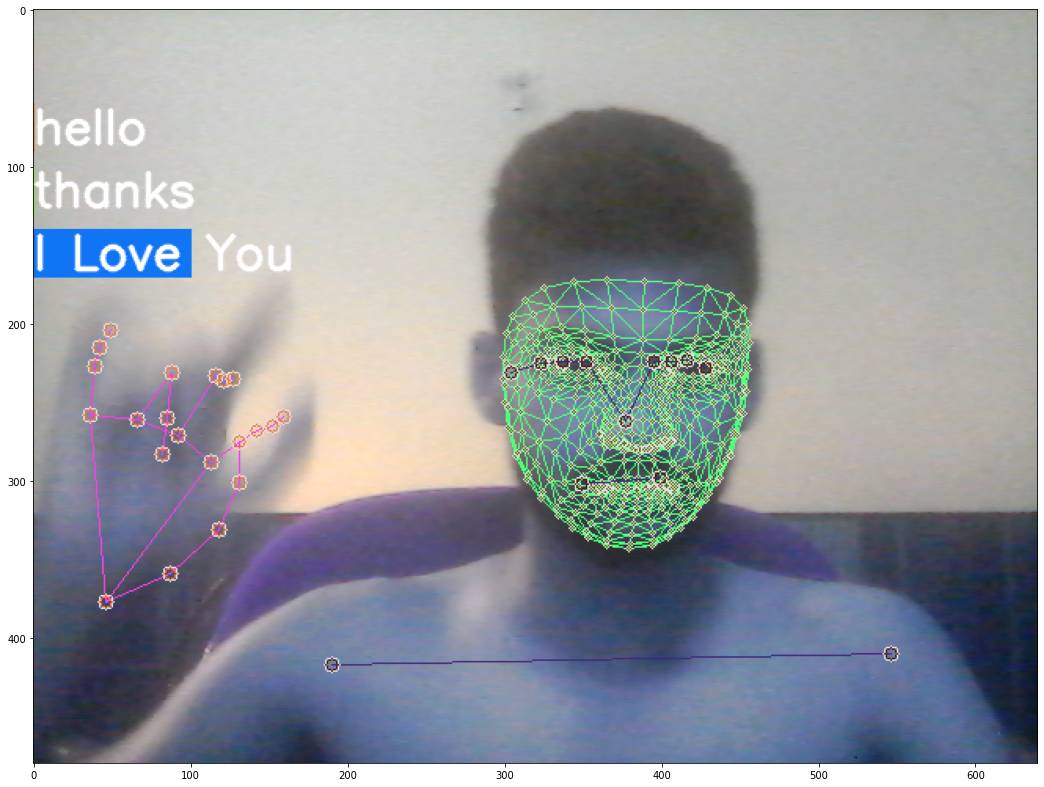

In [58]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [60]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionO

<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You


<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionO

<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionO

<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionO

<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionO

<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionO

I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_bas

<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_b

<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionO

<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionO

<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'

<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionO

I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_bas

<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionO

<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'

I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_bas

<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutput

hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutpu

<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'

I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python

<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutpu

<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.S

I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_bas

I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_bas

<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionO

hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<cla

<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionO

<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.

hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOu

<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.py

hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'm

<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_bas

<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionO

<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.py

<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.S

<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'

<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionO

<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionO

I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_bas

<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOut

<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.Solution

<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'me

<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.S

thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.So

I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I Love You
<class 'mediapipe.python.solution_bas

<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.S

<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.Solution

<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'

<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionO

In [55]:
 cap.release()
cv2.destroyAllWindows()

In [63]:
x=12.6

x//=2

1
